In [1]:
import numpy as np
import pandas as pd
import yfinance
import pandas_ta as ta

# Paper 3 data

In [2]:
df = pd.read_csv('..\data\processed\Processed_S&P.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\processed\\Processed_S&P.csv'

In [ ]:
for col, val in df.isna().sum().iteritems():
    print(f'{col}: {val}')

Close: 0
Volume: 1
mom: 1
mom1: 2
mom2: 3
mom3: 4
ROC_5: 5
ROC_10: 10
ROC_15: 15
ROC_20: 20
EMA_10: 9
EMA_20: 19
EMA_50: 49
EMA_200: 199
DTB4WK: 0
DTB3: 0
DTB6: 0
DGS5: 0
DGS10: 0
Oil: 1
Gold: 1
DAAA: 0
DBAA: 0
GBP: 478
JPY: 479
CAD: 483
CNY: 479
AAPL: 1
AMZN: 1
GE: 1
JNJ: 1
JPM: 1
MSFT: 1
WFC: 1
XOM: 1
FCHI: 40
FTSE: 71
GDAXI: 67
DJI: 1
HSI: 170
IXIC: 1
SSEC: 238
RUT: 1
NYSE: 1
TE1: 0
TE2: 0
TE3: 0
TE5: 0
TE6: 0
DE1: 0
DE2: 0
DE4: 0
DE5: 0
DE6: 0
CTB3M: 1
CTB6M: 1
CTB1Y: 1
Name: 0
AUD: 0
Brent: 0
CAC-F: 4
copper-F: 0
WIT-oil: 0
DAX-F: 4
DJI-F: 0
EUR: 0
FTSE-F: 6
gold-F: 0
HSI-F: 75
KOSPI-F: 79
NASDAQ-F: 0
GAS-F: 0
Nikkei-F: 0
NZD: 0
silver-F: 0
RUSSELL-F: 0
S&P-F: 0
CHF: 0
Dollar index-F: 0
Dollar index: 0
wheat-F: 2
XAG: 0
XAU: 0


In [ ]:
pd.Series(df.index.dayofweek).value_counts()

2    408
1    407
3    401
4    397
0    371
Name: Date, dtype: int64

In [ ]:
print(pd.Series(df[df['SSEC'].isna()].index.dayofweek).value_counts())
df[df['SSEC'].isna()].head()

0    62
1    55
2    41
3    40
4    40
Name: Date, dtype: int64


Close    Volume       mom      mom1      mom2      mom3  \
Date                                                                        
2009-12-31  1115.099976       NaN       NaN       NaN       NaN       NaN   
2010-01-04  1132.989990  0.921723  0.016043       NaN       NaN       NaN   
2010-02-16  1094.869995 -0.019206  0.018001 -0.002745  0.009680 -0.002233   
2010-02-17  1099.510010  0.043732  0.004238  0.018001 -0.002745  0.009680   
2010-02-18  1106.750000 -0.089361  0.006585  0.004238  0.018001 -0.002745   

               ROC_5    ROC_10    ROC_15    ROC_20  ...   NZD  silver-F  \
Date                                                ...                   
2009-12-31       NaN       NaN       NaN       NaN  ...  0.03      0.26   
2010-01-04       NaN       NaN       NaN       NaN  ...  1.52      3.26   
2010-02-16  3.608267  0.521493 -0.174149 -3.623147  ...  1.32      4.04   
2010-02-17  2.708029 -0.345316  0.672053 -4.409550  ... -0.52     -1.90   
2010-02-18  3.615664  0.863040  0.842825 -2.749467  ... -1.00     -0.37   

            RUSSELL-F  S&P-F   CHF  Dollar index-F  Dollar index  wheat-F  \
Date                                                                        
2009-12-31      -1.08  -1.00 -0.11           -0.08         -0.06    -0.48   
2010-01-04       1.61   1.62 -0.57           -0.59         -0.42     3.12   
2010-02-16       1.18   1.32 -1.07           -0.86         -0.78     3.96   
2010-02-17       0.97   0.57  1.08            0.90          0.85    -1.98   
2010-02-18       0.56   0.55  0.93            0.00          0.02    -2.22   

             XAG   XAU  
Date                    
2009-12-31  0.30  0.39  
2010-01-04  3.91  2.10  
2010-02-16  3.93  1.72  
2010-02-17 -0.68 -0.42  
2010-02-18  1.00  0.78  

[5 rows x 83 columns]

# Extract Data

## Technical
2.	Close	Close price	Primitive	Yahoo Finance
3.	Vol	Relative change of volume	Technical Indicator	TA-Lib
4.	MOM-1	Return of 2 days before	Technical Indicator	TA-Lib
5.	MOM-2	Return of 3 days before	Technical Indicator	TA-Lib
6.	MOM-3	Return of 4 days before	Technical Indicator	TA-Lib
7.	ROC-5	5 days Rate of Change	Technical Indicator	TA-Lib
8.	ROC-10	10 days Rate of Change	Technical Indicator	TA-Lib
9.	ROC-15	15 days Rate of Change	Technical Indicator	TA-Lib
10.	ROC-20	20 days Rate of Change	Technical Indicator	TA-Lib
11.	EMA-10	10 days Exponential Moving Average	Technical Indicator	TA-Lib
12.	EMA-20	20 days Exponential Moving Average	Technical Indicator	TA-Lib
13.	EMA-50	50 days Exponential Moving Average	Technical Indicator	TA-Lib
14.	EMA-200	200 days Exponential Moving Average	Technical Indicator	TA-Lib

In [40]:
ticker = 'GBP=X'
yf_data = yfinance.download(ticker, end="2023-02-20")
yf_data = yf_data.rename(columns={'Open':'open', 'High': 'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})
yf_data.drop(columns=['Adj Close'])
yf_data.shape

[*********************100%***********************]  1 of 1 completed


(4998, 6)

In [3]:
tech_data = yf_data[['close']]
tech_data['vol_pct'] = yf_data['volume'].pct_change()
tech_data

C:\Users\saxen\AppData\Local\Temp\ipykernel_3016\3481834398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_data['vol_pct'] = yf_data['volume'].pct_change()


close   vol_pct
Date                            
1993-01-29   43.937500       NaN
1993-02-01   44.250000 -0.521033
1993-02-02   44.343750 -0.581061
1993-02-03   44.812500  1.629906
1993-02-04   45.000000  0.003967
...                ...       ...
2023-02-13  412.829987 -0.082750
2023-02-14  412.640015  0.361647
2023-02-15  413.980011 -0.303584
2023-02-16  408.279999  0.241664
2023-02-17  407.260010  0.167814

[7569 rows x 2 columns]

In [4]:
# ROC
ROC_periods = [5, 10, 15, 20]
for period in ROC_periods:
    tech_data[f'ROC-{period}'] = ta.roc(tech_data['close'], period)
tech_data.head(25)

C:\Users\saxen\AppData\Local\Temp\ipykernel_3016\2419507476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_data[f'ROC-{period}'] = ta.roc(tech_data['close'], period)
C:\Users\saxen\AppData\Local\Temp\ipykernel_3016\2419507476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_data[f'ROC-{period}'] = ta.roc(tech_data['close'], period)
C:\Users\saxen\AppData\Local\Temp\ipykernel_3016\2419507476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

close    vol_pct     ROC-5    ROC-10    ROC-15    ROC-20
Date                                                                   
1993-01-29  43.93750        NaN       NaN       NaN       NaN       NaN
1993-02-01  44.25000  -0.521033       NaN       NaN       NaN       NaN
1993-02-02  44.34375  -0.581061       NaN       NaN       NaN       NaN
1993-02-03  44.81250   1.629906       NaN       NaN       NaN       NaN
1993-02-04  45.00000   0.003967       NaN       NaN       NaN       NaN
1993-02-05  44.96875  -0.074130  2.347084       NaN       NaN       NaN
1993-02-08  44.96875   0.211339  1.624294       NaN       NaN       NaN
1993-02-09  44.65625  -0.795169  0.704722       NaN       NaN       NaN
1993-02-10  44.71875   2.108927 -0.209205       NaN       NaN       NaN
1993-02-11  44.93750  -0.948630 -0.138889       NaN       NaN       NaN
1993-02-12  44.59375   1.179487 -0.833912  1.493599       NaN       NaN
1993-02-16  43.46875   7.818824 -3.335650 -1.765537       NaN       NaN
1993-02-17  43.43750  -0.437300 -2.729181 -2.043693       NaN       NaN
1993-02-18  43.40625   0.792793 -2.935010 -3.138075       NaN       NaN
1993-02-19  43.56250  -0.907696 -3.059805 -3.194444       NaN       NaN
1993-02-22  43.71875  13.716332 -1.962158 -2.779708 -0.497866       NaN
1993-02-23  43.68750  -0.272391  0.503235 -2.849201 -1.271186       NaN
1993-02-24  44.25000  -0.929623  1.870504 -0.909727 -0.211416       NaN
1993-02-25  44.34375   0.692015  2.159827 -0.838574 -1.046025       NaN
1993-02-26  44.40625   0.487640  1.936872 -1.182197 -1.319444       NaN
1993-03-01  44.28125   0.004532  1.286633 -0.700771 -1.528839  0.782361
1993-03-02  44.93750   1.742857  2.861230  3.378864 -0.069493  1.553672
1993-03-03  45.12500   0.535636  1.977401  3.884892  1.049685  1.761804
1993-03-04  44.87500  -0.680471  1.198027  3.383729  0.349406  0.139470
1993-03-05  44.75000  -0.553073  0.774103  2.725968 -0.417246 -0.555556

In [5]:
# Past returns
MOM_periods = [2,3,5]
for period in MOM_periods:
    tech_data[f'MOM-{period}'] = tech_data['close'].pct_change().shift(period)
tech_data.head(10)

close   vol_pct     ROC-5  ROC-10  ROC-15  ROC-20     MOM-2  \
Date                                                                         
1993-01-29  43.93750       NaN       NaN     NaN     NaN     NaN       NaN   
1993-02-01  44.25000 -0.521033       NaN     NaN     NaN     NaN       NaN   
1993-02-02  44.34375 -0.581061       NaN     NaN     NaN     NaN       NaN   
1993-02-03  44.81250  1.629906       NaN     NaN     NaN     NaN  0.007112   
1993-02-04  45.00000  0.003967       NaN     NaN     NaN     NaN  0.002119   
1993-02-05  44.96875 -0.074130  2.347084     NaN     NaN     NaN  0.010571   
1993-02-08  44.96875  0.211339  1.624294     NaN     NaN     NaN  0.004184   
1993-02-09  44.65625 -0.795169  0.704722     NaN     NaN     NaN -0.000694   
1993-02-10  44.71875  2.108927 -0.209205     NaN     NaN     NaN  0.000000   
1993-02-11  44.93750 -0.948630 -0.138889     NaN     NaN     NaN -0.006949   

               MOM-3     MOM-4  
Date                            
1993-01-29       NaN       NaN  
1993-02-01       NaN       NaN  
1993-02-02       NaN       NaN  
1993-02-03       NaN       NaN  
1993-02-04  0.007112       NaN  
1993-02-05  0.002119  0.007112  
1993-02-08  0.010571  0.002119  
1993-02-09  0.004184  0.010571  
1993-02-10 -0.000694  0.004184  
1993-02-11  0.000000 -0.000694

In [6]:
# EMA
EMA_periods = [10, 20, 50, 200]
for period in EMA_periods:
    tech_data[f'EMA-{period}'] = ta.ema(tech_data['close'], period)
tech_data.head(25)

close    vol_pct     ROC-5    ROC-10    ROC-15    ROC-20  \
Date                                                                      
1993-01-29  43.93750        NaN       NaN       NaN       NaN       NaN   
1993-02-01  44.25000  -0.521033       NaN       NaN       NaN       NaN   
1993-02-02  44.34375  -0.581061       NaN       NaN       NaN       NaN   
1993-02-03  44.81250   1.629906       NaN       NaN       NaN       NaN   
1993-02-04  45.00000   0.003967       NaN       NaN       NaN       NaN   
1993-02-05  44.96875  -0.074130  2.347084       NaN       NaN       NaN   
1993-02-08  44.96875   0.211339  1.624294       NaN       NaN       NaN   
1993-02-09  44.65625  -0.795169  0.704722       NaN       NaN       NaN   
1993-02-10  44.71875   2.108927 -0.209205       NaN       NaN       NaN   
1993-02-11  44.93750  -0.948630 -0.138889       NaN       NaN       NaN   
1993-02-12  44.59375   1.179487 -0.833912  1.493599       NaN       NaN   
1993-02-16  43.46875   7.818824 -3.335650 -1.765537       NaN       NaN   
1993-02-17  43.43750  -0.437300 -2.729181 -2.043693       NaN       NaN   
1993-02-18  43.40625   0.792793 -2.935010 -3.138075       NaN       NaN   
1993-02-19  43.56250  -0.907696 -3.059805 -3.194444       NaN       NaN   
1993-02-22  43.71875  13.716332 -1.962158 -2.779708 -0.497866       NaN   
1993-02-23  43.68750  -0.272391  0.503235 -2.849201 -1.271186       NaN   
1993-02-24  44.25000  -0.929623  1.870504 -0.909727 -0.211416       NaN   
1993-02-25  44.34375   0.692015  2.159827 -0.838574 -1.046025       NaN   
1993-02-26  44.40625   0.487640  1.936872 -1.182197 -1.319444       NaN   
1993-03-01  44.28125   0.004532  1.286633 -0.700771 -1.528839  0.782361   
1993-03-02  44.93750   1.742857  2.861230  3.378864 -0.069493  1.553672   
1993-03-03  45.12500   0.535636  1.977401  3.884892  1.049685  1.761804   
1993-03-04  44.87500  -0.680471  1.198027  3.383729  0.349406  0.139470   
1993-03-05  44.75000  -0.553073  0.774103  2.725968 -0.417246 -0.555556   

               MOM-2     MOM-3     MOM-4     EMA-10     EMA-20  EMA-50  \
Date                                                                     
1993-01-29       NaN       NaN       NaN        NaN        NaN     NaN   
1993-02-01       NaN       NaN       NaN        NaN        NaN     NaN   
1993-02-02       NaN       NaN       NaN        NaN        NaN     NaN   
1993-02-03  0.007112       NaN       NaN        NaN        NaN     NaN   
1993-02-04  0.002119  0.007112       NaN        NaN        NaN     NaN   
1993-02-05  0.010571  0.002119  0.007112        NaN        NaN     NaN   
1993-02-08  0.004184  0.010571  0.002119        NaN        NaN     NaN   
1993-02-09 -0.000694  0.004184  0.010571        NaN        NaN     NaN   
1993-02-10  0.000000 -0.000694  0.004184        NaN        NaN     NaN   
1993-02-11 -0.006949  0.000000 -0.000694  44.659375        NaN     NaN   
1993-02-12  0.001400 -0.006949  0.000000  44.647443        NaN     NaN   
1993-02-16  0.004892  0.001400 -0.006949  44.433135        NaN     NaN   
1993-02-17 -0.007650  0.004892  0.001400  44.252111        NaN     NaN   
1993-02-18 -0.025228 -0.007650  0.004892  44.098318        NaN     NaN   
1993-02-19 -0.000719 -0.025228 -0.007650  44.000896        NaN     NaN   
1993-02-22 -0.000719 -0.000719 -0.025228  43.949597        NaN     NaN   
1993-02-23  0.003600 -0.000719 -0.000719  43.901943        NaN     NaN   
1993-02-24  0.003587  0.003600 -0.000719  43.965226        NaN     NaN   
1993-02-25 -0.000715  0.003587  0.003600  44.034049        NaN     NaN   
1993-02-26  0.012876 -0.000715  0.003587  44.101722  44.273438     NaN   
1993-03-01  0.002119  0.012876 -0.000715  44.134363  44.274182     NaN   
1993-03-02  0.001409  0.002119  0.012876  44.280388  44.337355     NaN   
1993-03-03 -0.002815  0.001409  0.002119  44.433954  44.412369     NaN   
1993-03-04  0.014820 -0.002815  0.001409  44.514144  44.456429     NaN   
1993-03-05  0.004172  0.014820 -0.002815  44.557027  44.484388   

In [7]:
# Add return and binary label
tech_data['Y_reg'] = tech_data['close'].pct_change().shift(-1)
tech_data['Y_bc'] = tech_data['Y_reg'].apply(lambda x: int(x > 0))
tech_data.tail()

close   vol_pct     ROC-5    ROC-10    ROC-15    ROC-20  \
Date                                                                       
2023-02-13  412.829987 -0.082750  0.732011  3.055491  3.045199  3.595982   
2023-02-14  412.640015  0.361647 -0.614174  1.515451  3.108446  3.738348   
2023-02-15  413.980011 -0.303584  0.810914  0.774105  3.404522  5.744724   
2023-02-16  408.279999  0.241664  0.292319 -2.039445  0.872143  5.053516   
2023-02-17  407.260010  0.167814 -0.191157 -1.234387  0.389474  2.874610   

               MOM-2     MOM-3     MOM-4      EMA-10      EMA-20      EMA-50  \
Date                                                                           
2023-02-13 -0.008669 -0.010935  0.013079  409.258099  405.363493  398.336530   
2023-02-14  0.002334 -0.008669 -0.010935  409.872993  406.056495  398.897451   
2023-02-15  0.011739  0.002334 -0.008669  410.619724  406.811116  399.488924   
2023-02-16 -0.000460  0.011739  0.002334  410.194319  406.951009  399.833672   
2023-02-17  0.003247 -0.000460  0.011739  409.660808  406.980438  400.124901   

               EMA-200     Y_reg  Y_bc  
Date                                    
2023-02-13  399.476363 -0.000460     0  
2023-02-14  399.607345  0.003247     1  
2023-02-15  399.750356 -0.013769     0  
2023-02-16  399.835228 -0.002498     0  
2023-02-17  399.909107       NaN     0

In [8]:
# tech_data = tech_data.drop(columns=['EMA-100'])
tech_data.isna().sum()

close        0
vol_pct      1
ROC-5        5
ROC-10      10
ROC-15      15
ROC-20      20
MOM-2        3
MOM-3        4
MOM-4        5
EMA-10       9
EMA-20      19
EMA-50      49
EMA-200    199
Y_reg        1
Y_bc         0
dtype: int64

In [9]:
tech_data.dropna(inplace=True)
tech_data.shape

(7369, 15)

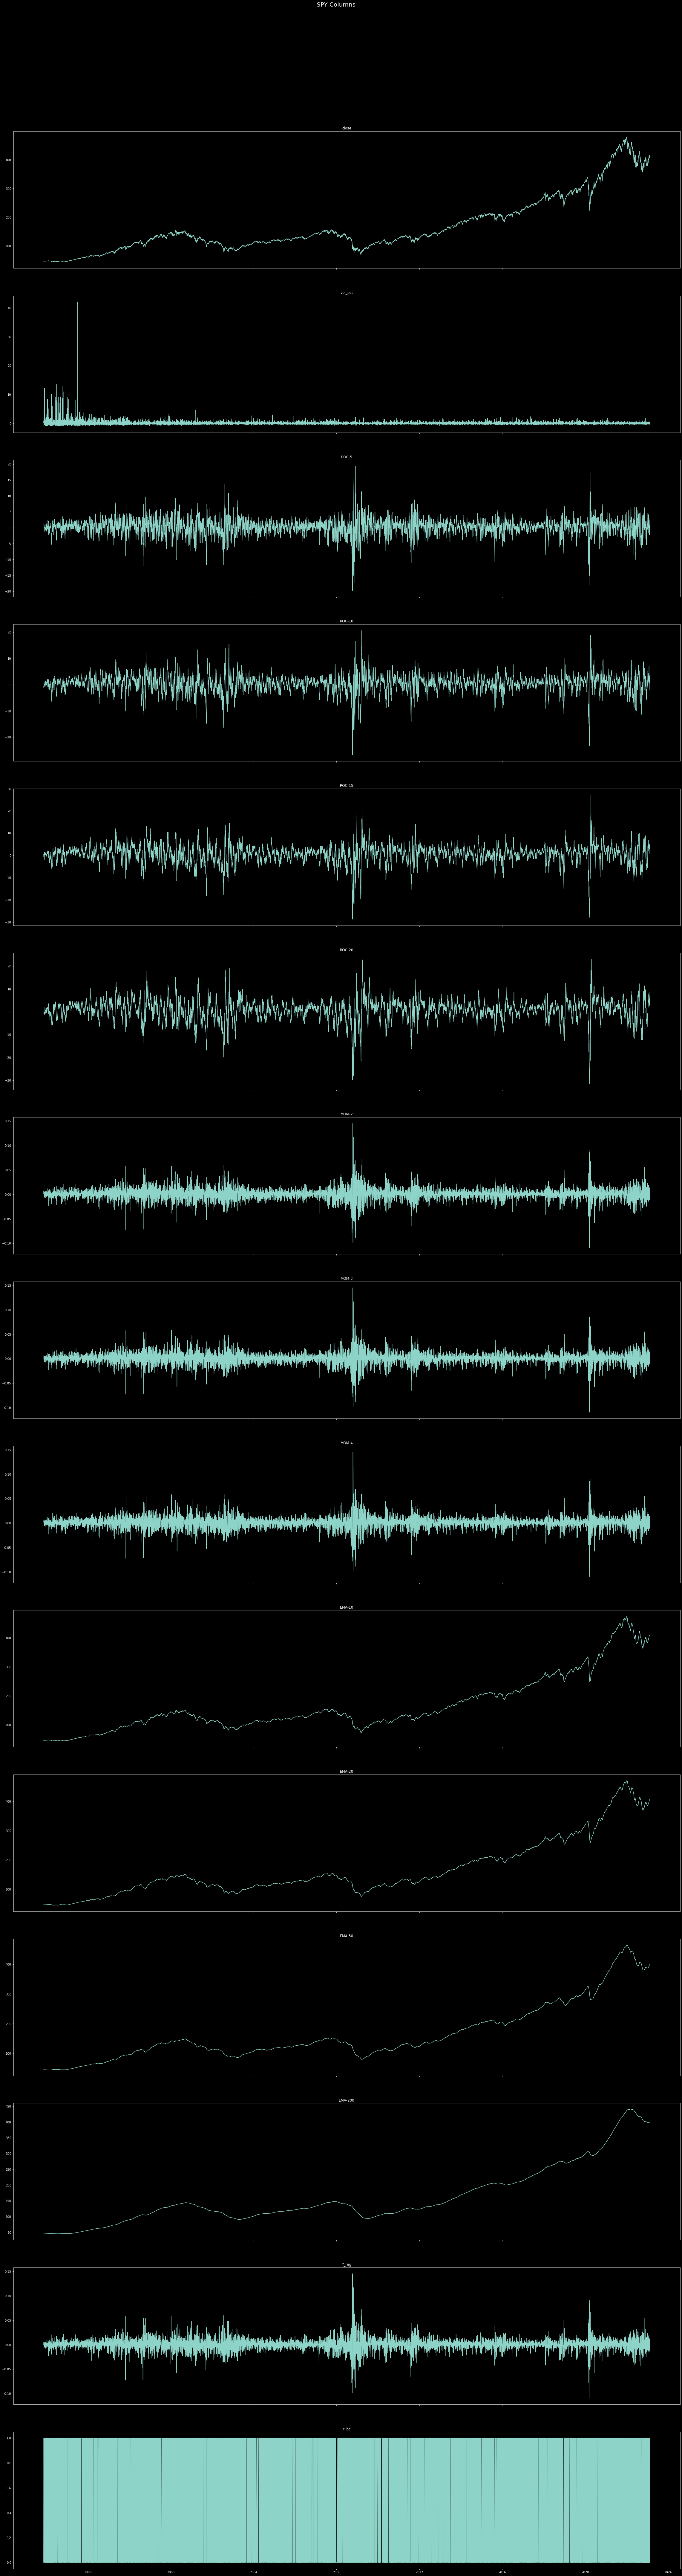

In [10]:
from utils.plot_utils import *
plot_cols(tech_data, ticker)

# Train/Test Split

In [11]:
tech_train = tech_data.iloc[:int(0.8*tech_data.shape[0]),:]
tech_val = tech_data.iloc[int(0.8*tech_data.shape[0]):int(0.9*tech_data.shape[0]),:]
tech_test = tech_data.iloc[int(0.9*tech_data.shape[0]):,:]

## Outlier Detection

In [12]:
tech_data.shape

(7369, 15)

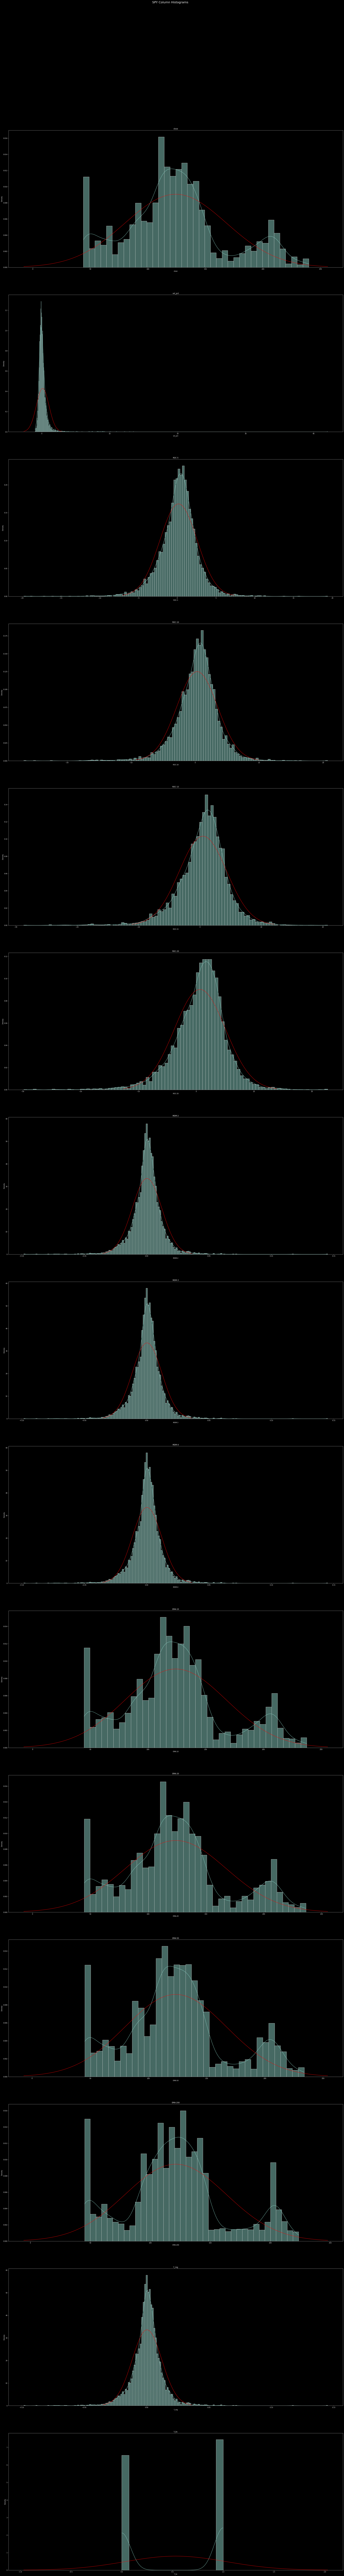

In [13]:
plot_col_histogram(tech_train, ticker, plot_gauss=True)

In [14]:
def get_outliers(df, gaus_cols, iqr_mult = 1.5, replace = False):
    df = df.copy()
    outlier = df.iloc[:,0].apply(lambda x: False)
    print(df.shape)
    for col in df.columns:
        if col in gaus_cols:
            q1, q3 = np.percentile(df[col],[25,75])
            upper_bound = q3 + iqr_mult*(q3-q1)
            lower_bound = q1 - iqr_mult*(q3-q1)

            high_out = df[col] > upper_bound
            low_out = df[col] < lower_bound
            col_out = high_out | low_out
            print(f'{col}: {(lower_bound, upper_bound)} High Outliers = {high_out.sum()}, Low Outliers = {low_out.sum()}, Total Outliers = {col_out.sum()}')

            if replace:
                df[col] = np.where(high_out, upper_bound, df[col])
                df[col] = np.where(low_out, lower_bound, df[col])
            
            outlier |= col_out
    print(f'Total Outliers: {outlier.sum()}')
    print(df[~outlier].shape)
    return df, outlier

In [15]:
td = tech_data.copy()
def func(df):
    df = df.copy()
    df['bleh'] = 0
    print(df.columns)
func(td)
print(td.columns)
print(tech_data.columns)

Index(['close', 'vol_pct', 'ROC-5', 'ROC-10', 'ROC-15', 'ROC-20', 'MOM-2',
       'MOM-3', 'MOM-4', 'EMA-10', 'EMA-20', 'EMA-50', 'EMA-200', 'Y_reg',
       'Y_bc', 'bleh'],
      dtype='object')
Index(['close', 'vol_pct', 'ROC-5', 'ROC-10', 'ROC-15', 'ROC-20', 'MOM-2',
       'MOM-3', 'MOM-4', 'EMA-10', 'EMA-20', 'EMA-50', 'EMA-200', 'Y_reg',
       'Y_bc'],
      dtype='object')
Index(['close', 'vol_pct', 'ROC-5', 'ROC-10', 'ROC-15', 'ROC-20', 'MOM-2',
       'MOM-3', 'MOM-4', 'EMA-10', 'EMA-20', 'EMA-50', 'EMA-200', 'Y_reg',
       'Y_bc'],
      dtype='object')


In [16]:
gaus_cols = [col for col in tech_data.columns if 'ROC' in col or 'MOM' in col or 'pct' in col]
tech_train_fixed, outliers = get_outliers(tech_train, gaus_cols, iqr_mult=1.5, replace=True)

(5895, 15)
vol_pct: (-0.9460682798380116, 1.010662703595715) High Outliers = 304, Low Outliers = 3, Total Outliers = 307
ROC-5: (-4.786376307782657, 5.229309734118603) High Outliers = 99, Low Outliers = 151, Total Outliers = 250
ROC-10: (-6.362120923576617, 7.189999681849919) High Outliers = 85, Low Outliers = 152, Total Outliers = 237
ROC-15: (-7.6071011145632745, 8.90137115939363) High Outliers = 77, Low Outliers = 164, Total Outliers = 241
ROC-20: (-9.057791579363645, 10.67035151413129) High Outliers = 61, Low Outliers = 157, Total Outliers = 218
MOM-2: (-0.02104738757539057, 0.022123784511418082) High Outliers = 157, Low Outliers = 222, Total Outliers = 379
MOM-3: (-0.02104738757539057, 0.022123784511418082) High Outliers = 157, Low Outliers = 222, Total Outliers = 379
MOM-4: (-0.02104738757539057, 0.022123784511418082) High Outliers = 157, Low Outliers = 222, Total Outliers = 379
Total Outliers: 1394
(4501, 15)


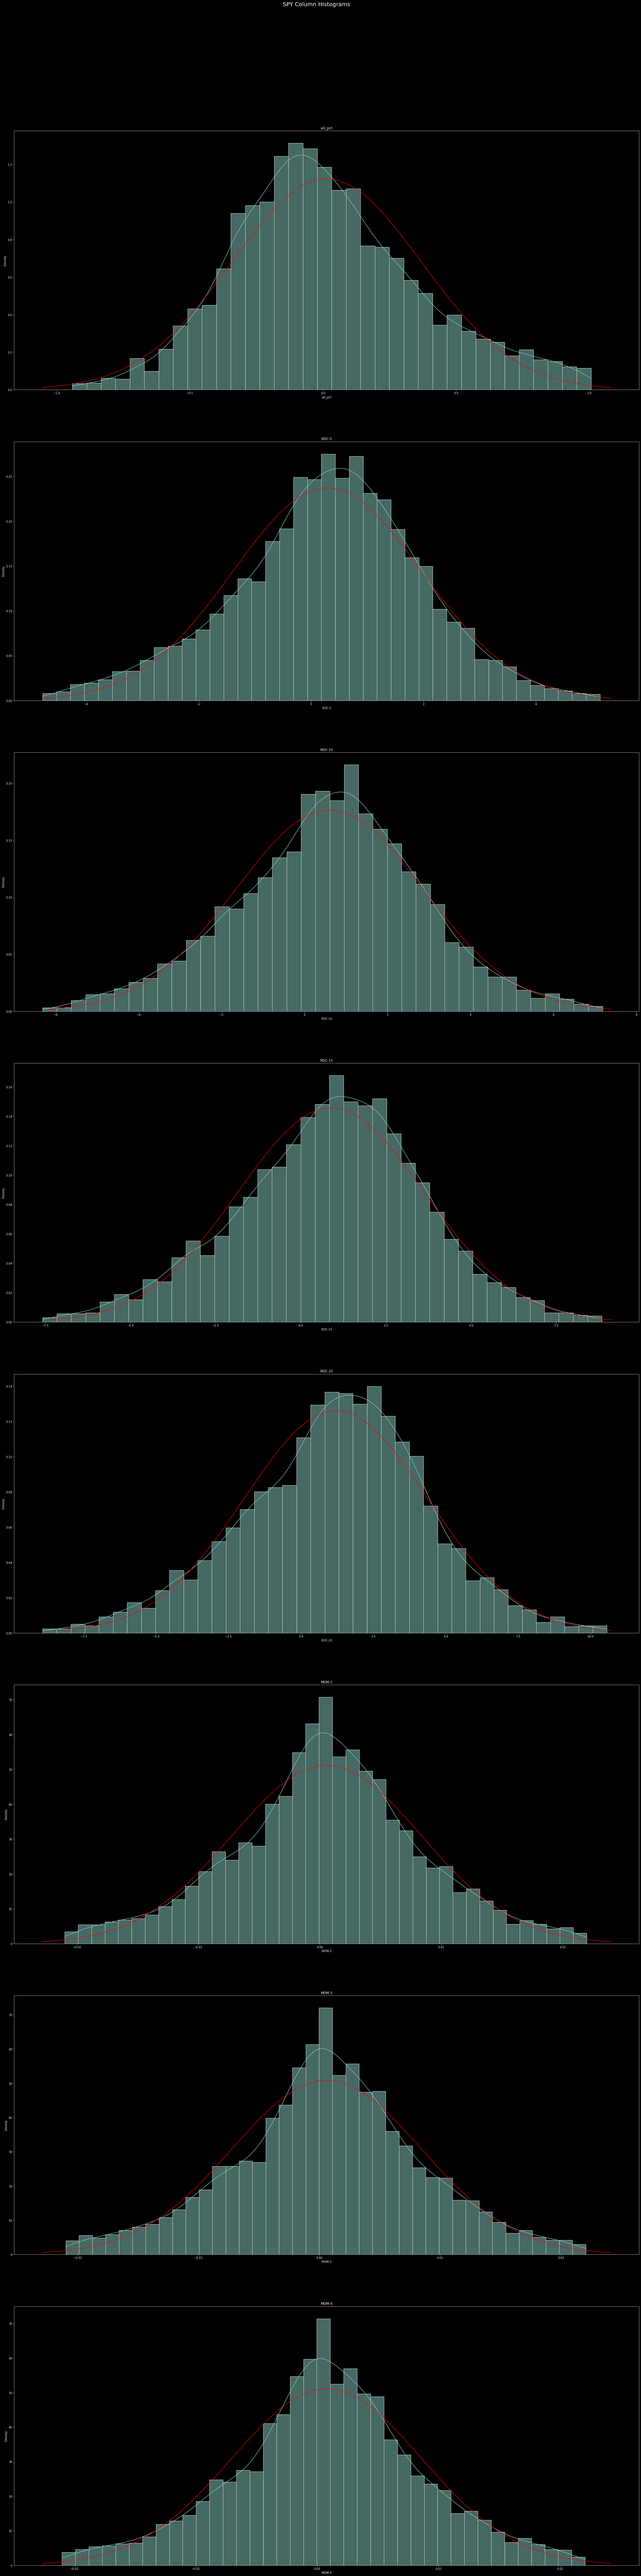

In [17]:
plot_col_histogram(tech_train[~outliers][gaus_cols], ticker)

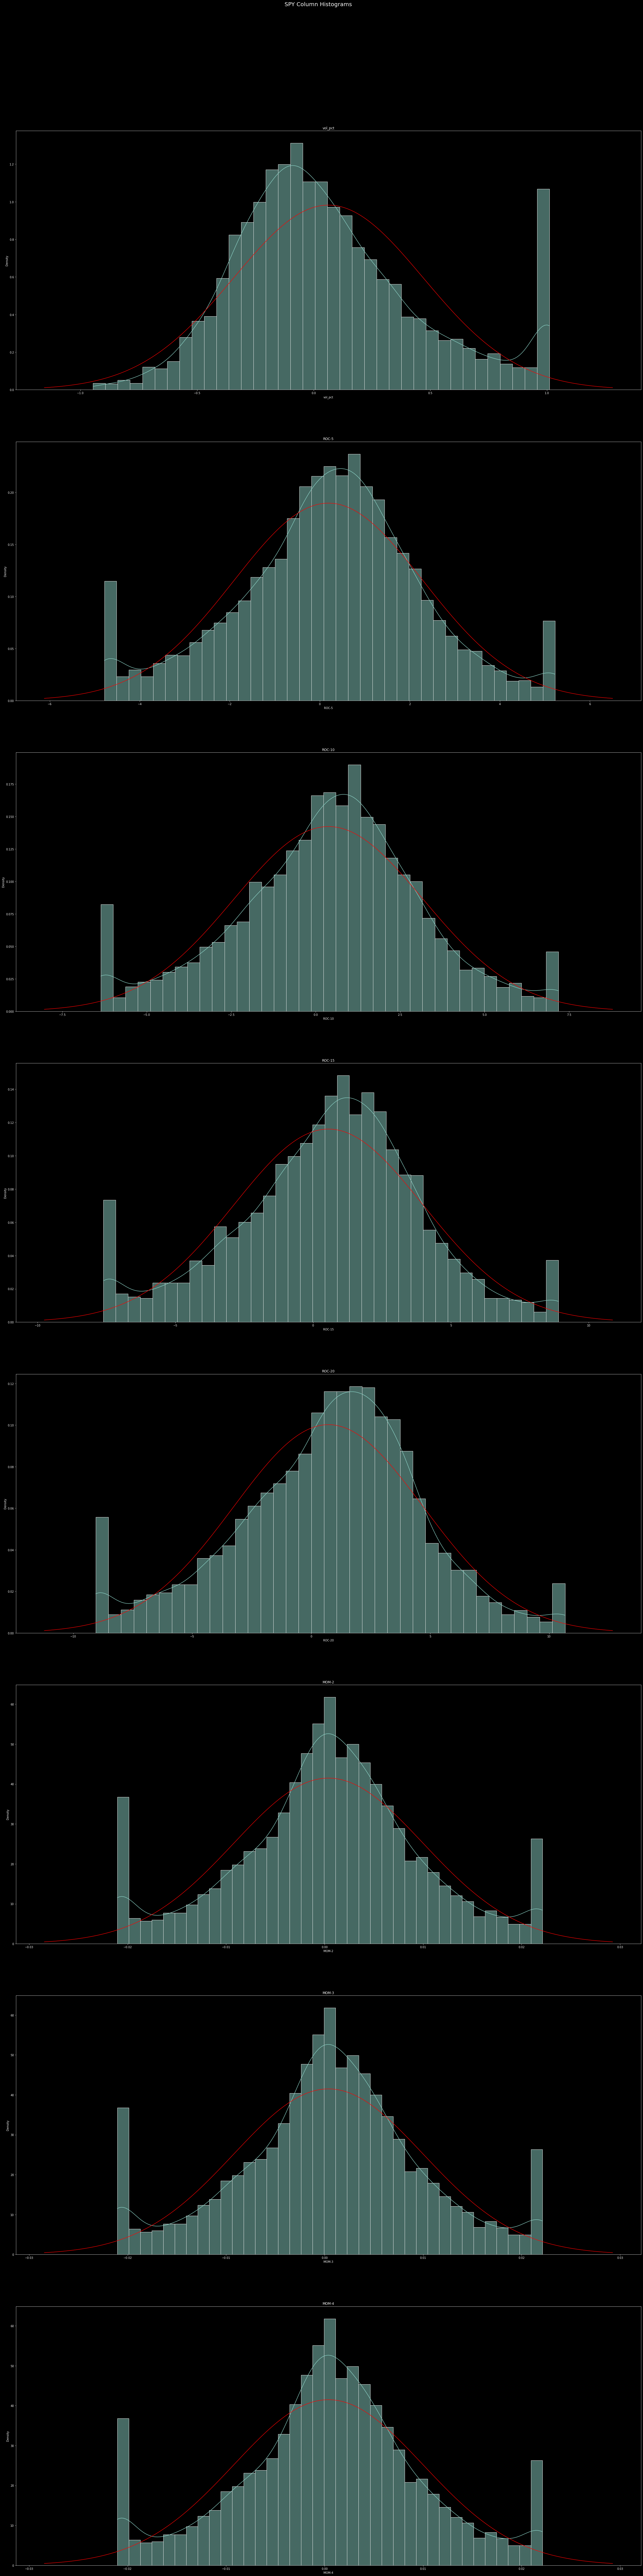

In [18]:
plot_col_histogram(tech_train_fixed[gaus_cols], ticker)

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def standardize_and_scale(df_train, df_train_fixed, df_val, df_test, outliers):
    scalers = {}
    df_train_norm = pd.DataFrame()
    df_val_norm = pd.DataFrame()
    df_test_norm = pd.DataFrame()
    for i, col in enumerate(df_train.columns):
        
        if 'Y' not in col:
            scaler = StandardScaler() if df_train[col].min()<0 else MinMaxScaler()
            scaler = scaler.fit(np.array(df_train[~outliers][col]).reshape(-1,1))
            df_train_norm[col] = pd.Series(np.squeeze(scaler.transform(np.array(df_train_fixed[col]).reshape(-1,1))), index=df_train.index)
            df_val_norm[col] = pd.Series(np.squeeze(scaler.transform(np.array(df_val[col]).reshape(-1,1))), index=df_val.index)
            df_test_norm[col] = pd.Series(np.squeeze(scaler.transform(np.array(df_test[col]).reshape(-1,1))), index=df_test.index)
            scalers[col] = scaler
    
        else:
            df_train_norm[col] = df_train[col]
            df_val_norm[col] = df_val[col]
            df_test_norm[col] = df_test[col]

    print(scalers)
    return df_train_norm, df_val_norm, df_test_norm, scalers

In [28]:
tech_train_norm, tech_val_norm, tech_test_norm, scalers = standardize_and_scale(tech_train, tech_train_fixed, tech_val, tech_test, outliers)

{'close': MinMaxScaler(), 'vol_pct': StandardScaler(), 'ROC-5': StandardScaler(), 'ROC-10': StandardScaler(), 'ROC-15': StandardScaler(), 'ROC-20': StandardScaler(), 'MOM-2': StandardScaler(), 'MOM-3': StandardScaler(), 'MOM-4': StandardScaler(), 'EMA-10': MinMaxScaler(), 'EMA-20': MinMaxScaler(), 'EMA-50': MinMaxScaler(), 'EMA-200': MinMaxScaler()}


In [29]:
tech_train_norm.head()

close   vol_pct     ROC-5    ROC-10    ROC-15    ROC-20  \
Date                                                                     
1993-11-11  0.011815  2.526968  0.518265 -0.708918 -0.496254 -0.676671   
1993-11-12  0.012933  0.573293  0.514991 -0.502295 -0.152405 -0.696094   
1993-11-15  0.012774  2.804905  0.393151 -0.648862 -0.275630 -0.633788   
1993-11-16  0.013891  2.804905  0.634426 -0.413447 -0.079047 -0.253984   
1993-11-17  0.012614 -2.623284 -0.131120 -0.087138 -0.300182 -0.465908   

               MOM-2     MOM-3     MOM-4    EMA-10    EMA-20    EMA-50  \
Date                                                                     
1993-11-11  0.014579  0.096297  0.511829  0.009187  0.008248  0.005002   
1993-11-12  0.882703  0.009650  0.073817  0.009402  0.008346  0.005079   
1993-11-15 -0.417005  0.873136 -0.013321  0.009548  0.008419  0.005147   
1993-11-16  0.532563 -0.419627  0.855062  0.009873  0.008594  0.005258   
1993-11-17 -0.158302  0.524867 -0.445033  0.009904  0.008628  0.005312   

             EMA-200     Y_reg  Y_bc  
Date                                  
1993-11-11  0.000000  0.004717     1  
1993-11-12  0.000077 -0.000671     0  
1993-11-15  0.000152  0.004698     1  
1993-11-16  0.000239 -0.005344     0  
1993-11-17  0.000310 -0.002686     0

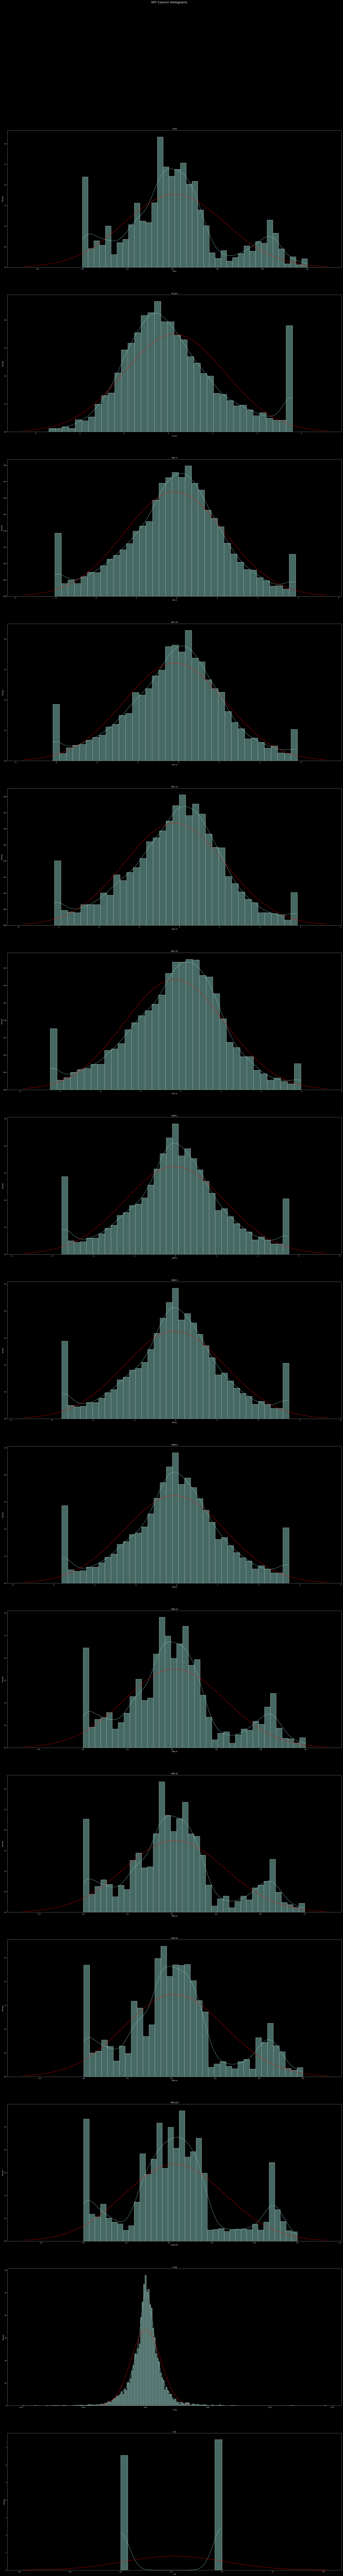

In [34]:
import pickle

tech_train_norm.to_csv('data/processed/tech/tech_train.csv')
tech_val_norm.to_csv('data/processed/tech/tech_val.csv')
tech_test_norm.to_csv('data/processed/tech/tech_test.csv')
with open('data/processed/tech/scalers.pickle', mode='xb',) as f: pickle.dump(scalers, f, protocol=pickle.HIGHEST_PROTOCOL)

## Reg on ROC-5

In [35]:
tech_train_norm['Y_reg'] = tech_train_norm['ROC-5'].shift(-1)
tech_val_norm['Y_reg'] = tech_val_norm['ROC-5'].shift(-1)
tech_test_norm['Y_reg'] = tech_test_norm['ROC-5'].shift(-1)

tech_train_norm.dropna().to_csv('data/processed/tech/tech_reg_train.csv')
tech_val_norm.dropna().to_csv('data/processed/tech/tech_reg_val.csv')
tech_test_norm.dropna().to_csv('data/processed/tech/tech_reg_test.csv')